In [1]:
import pandas as pd
import numpy as np
import modeltest as deep
import experiment as exp
import myutil as util
import tensorflow as tf
from itertools import product

from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input
import importlib
importlib.reload(deep)
importlib.reload(exp)

<module 'experiment' from 'c:\\Users\\kyeongtaek\\generative_model\\image_segment\\experiment.py'>

In [70]:
#파일 읽기
filepath_german_csv = 'segment.csv'
d_german_df = pd.read_csv(filepath_german_csv)

#numpy 변환
d_german_np = np.array(d_german_df)

# sample 수, 특징 수 등 계산
n_row = d_german_np.shape[0]
n_features = d_german_np.shape[1]-1

# 입력과 출력 데이터 분리
x = d_german_np[:, :n_features]
y = d_german_np[:, n_features]-1

#정규화
x_norm = (x - np.min(x,0))/ (np.max(x,0) - np.min(x,0))
y_norm = (y - np.min(y,0))/ (np.max(y,0) - np.min(y,0))

C:\Users\kyeongtaek\AppData\Local\Temp\ipykernel_12004\1936844828.py:17: RuntimeWarning: invalid value encountered in divide
  x_norm = (x - np.min(x,0))/ (np.max(x,0) - np.min(x,0))


In [71]:
import tensorflow_addons as tfa

Triplet Loss

Epoch 1/500
29/29 [==============================] - 1s 16ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 2/500
29/29 [==============================] - 0s 7ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 3/500
29/29 [==============================] - 0s 7ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 4/500
29/29 [==============================] - 0s 8ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 5/500
29/29 [==============================] - 0s 8ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 6/500
29/29 [==============================] - 0s 8ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 7/500
29/29 [==============================] - 0s 7ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 8/500
29/29 [==============================] - 0s 8ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 9/500
29/29 [==============================] - 0s 8ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 10/500
29/29 [==============================] - 0s 8ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 11

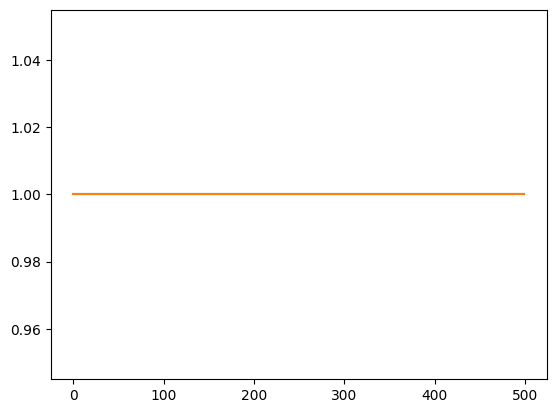

In [52]:
# 10fold validation 수행여부
bTenFoldValidation = False
if not bTenFoldValidation:  # 학습 & 테스트를 1회만 수행하는 경우
    # 데이터 분할
    [x_train, x_val, x_test, y_train, y_val, y_test] = exp.split_data(x_norm, y, test_ratio=0.0, val_ratio=0.2)

    # 모델 불러오기 & 컴파일
    g = deep.encoder(x.shape[1:])
        
    g.compile(loss=tfa.losses.TripletSemiHardLoss(), optimizer=Adam(learning_rate=0.001))

    hist = g.fit(x_train, y_train, epochs=500, batch_size = 64, validation_data=(x_val, y_val))
    # 결과 출력

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.show()

else:  # N fold Validation
    idx = np.array(range(n_row))
    np.random.shuffle(idx)  # 데이터 인덱스 섞기

    N = 10
    total = 0
    nClass = 2
    cm = np.zeros([N, nClass, nClass])
    for i in range(N):
        # Train/Test 데이터 분할
        [x_train, x_test, y_train, y_test] = exp.split_data_for_N_fold_validation(x_norm, y, fold=N, idx=i)

        # 모델 불러오기 & 컴파일
        g = deep.encoder(x.shape[1:])
        
        g.compile(loss=tfa.losses.TripletSemiHardLoss(), optimizer=Adam(learning_rate=0.0001))

        # 학습
        hist = g.fit(x_train, y_train, epochs=2000, batch_size = 256, validation_data=(x_test, y_test))
        
        plt.plot(hist.history['loss'])
        plt.plot(hist.history['accuracy'])
    #plt.plot(result.val_acc)
        plt.show()


Triplet 전이학습

Epoch 1/500
33/33 [==============================] - 1s 11ms/step - loss: 0.2717
Epoch 2/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0845
Epoch 3/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0631
Epoch 4/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0494
Epoch 5/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0419
Epoch 6/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0425
Epoch 7/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0371
Epoch 8/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0335
Epoch 9/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0357
Epoch 10/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0345
Epoch 11/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0324
Epoch 12/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0309
Epoch 13/500
33/33 [================

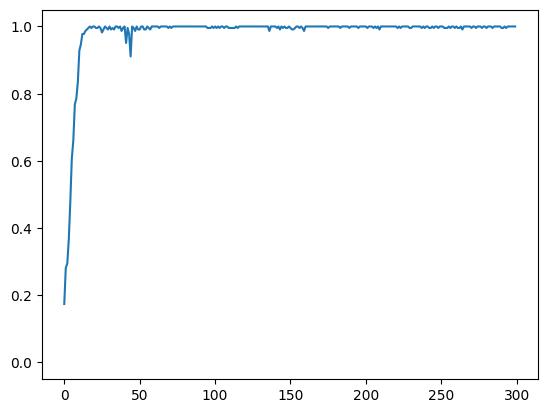

Epoch 1/500
33/33 [==============================] - 1s 7ms/step - loss: 0.2728
Epoch 2/500
33/33 [==============================] - 0s 7ms/step - loss: 0.1035
Epoch 3/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0685
Epoch 4/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0610
Epoch 5/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0493
Epoch 6/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0428
Epoch 7/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0444
Epoch 8/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0321
Epoch 9/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0362
Epoch 10/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0378
Epoch 11/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0373
Epoch 12/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0379
Epoch 13/500
33/33 [=================

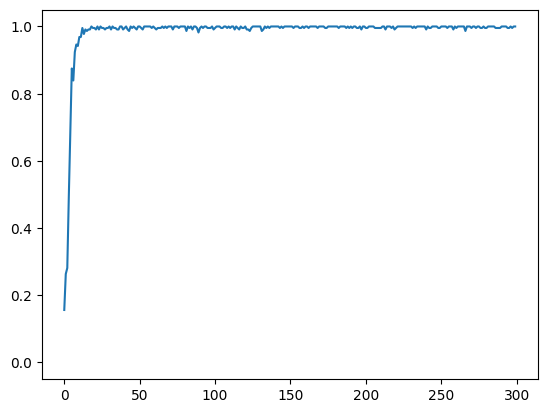

Epoch 1/500
33/33 [==============================] - 1s 6ms/step - loss: 0.2073
Epoch 2/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0943
Epoch 3/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0629
Epoch 4/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0544
Epoch 5/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0454
Epoch 6/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0430
Epoch 7/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0362
Epoch 8/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0387
Epoch 9/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0326
Epoch 10/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0334
Epoch 11/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0287
Epoch 12/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0299
Epoch 13/500
33/33 [=================

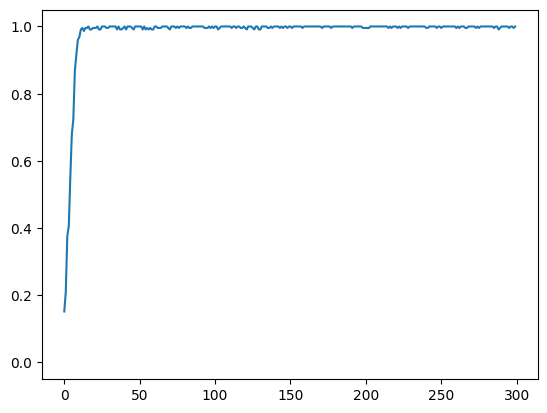

Epoch 1/500
33/33 [==============================] - 1s 7ms/step - loss: 0.2151
Epoch 2/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0698
Epoch 3/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0550
Epoch 4/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0489
Epoch 5/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0463
Epoch 6/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0460
Epoch 7/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0439
Epoch 8/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0423
Epoch 9/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0339
Epoch 10/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0352
Epoch 11/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0305
Epoch 12/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0316
Epoch 13/500
33/33 [=================

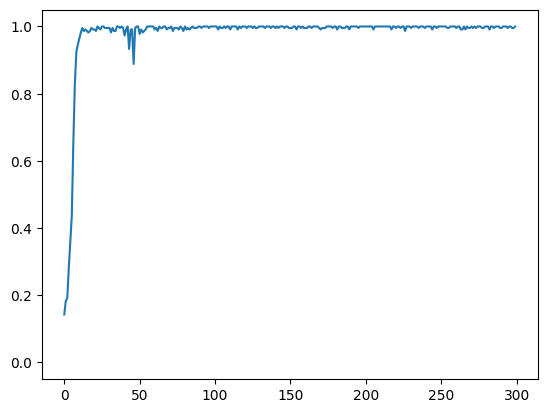

Epoch 1/500
33/33 [==============================] - 1s 7ms/step - loss: 0.2057
Epoch 2/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0750
Epoch 3/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0487
Epoch 4/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0462
Epoch 5/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0439
Epoch 6/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0373
Epoch 7/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0327
Epoch 8/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0275
Epoch 9/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0290
Epoch 10/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0298
Epoch 11/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0288
Epoch 12/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0271
Epoch 13/500
33/33 [=================

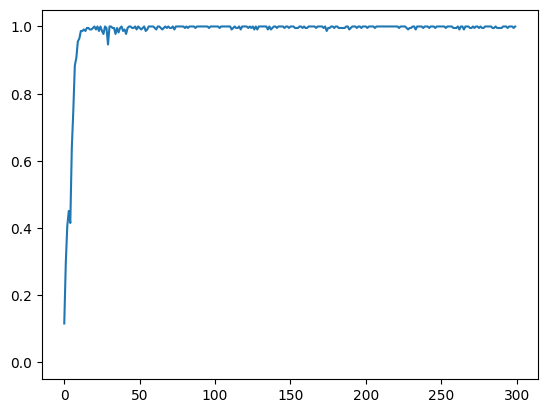

Epoch 1/500
33/33 [==============================] - 1s 7ms/step - loss: 0.2863
Epoch 2/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0928
Epoch 3/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0676
Epoch 4/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0619
Epoch 5/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0505
Epoch 6/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0504
Epoch 7/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0434
Epoch 8/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0472
Epoch 9/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0373
Epoch 10/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0329
Epoch 11/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0338
Epoch 12/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0325
Epoch 13/500
33/33 [=================

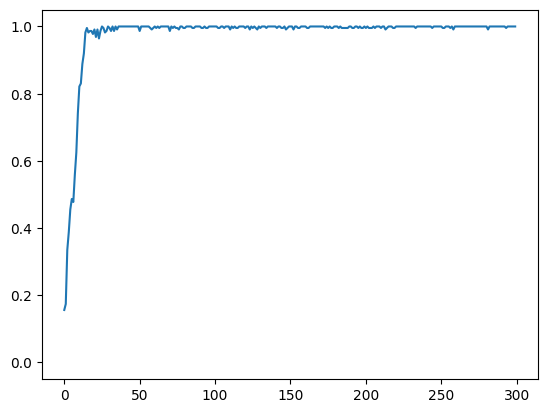

Epoch 1/500
33/33 [==============================] - 1s 7ms/step - loss: 0.2363
Epoch 2/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0951
Epoch 3/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0676
Epoch 4/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0586
Epoch 5/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0544
Epoch 6/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0505
Epoch 7/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0431
Epoch 8/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0415
Epoch 9/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0403
Epoch 10/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0293
Epoch 11/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0313
Epoch 12/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0275
Epoch 13/500
33/33 [=================

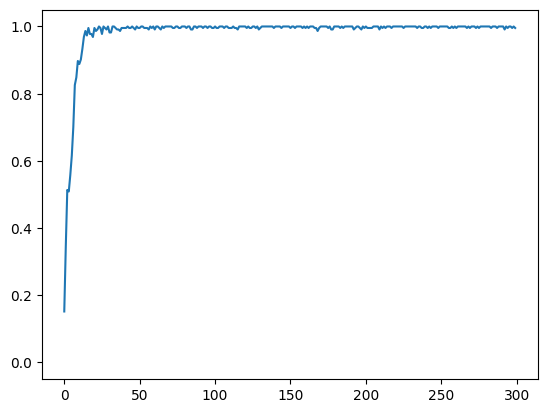

Epoch 1/500
33/33 [==============================] - 1s 7ms/step - loss: 0.2067
Epoch 2/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0734
Epoch 3/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0593
Epoch 4/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0488
Epoch 5/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0486
Epoch 6/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0357
Epoch 7/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0421
Epoch 8/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0354
Epoch 9/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0303
Epoch 10/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0319
Epoch 11/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0335
Epoch 12/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0297
Epoch 13/500
33/33 [=================

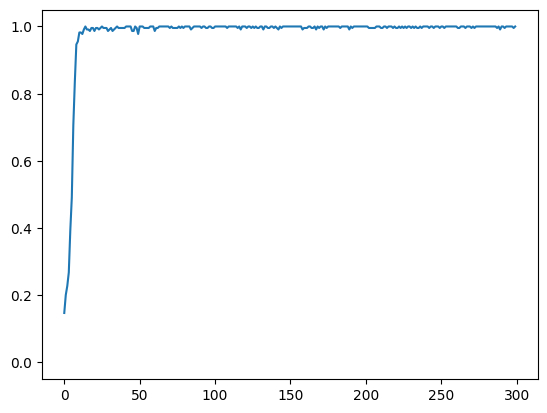

Epoch 1/500
33/33 [==============================] - 1s 6ms/step - loss: 0.2681
Epoch 2/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0956
Epoch 3/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0686
Epoch 4/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0542
Epoch 5/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0480
Epoch 6/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0480
Epoch 7/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0426
Epoch 8/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0428
Epoch 9/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0348
Epoch 10/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0295
Epoch 11/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0334
Epoch 12/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0328
Epoch 13/500
33/33 [=================

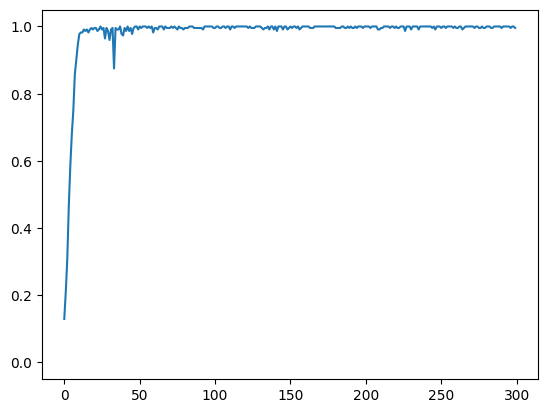

Epoch 1/500
33/33 [==============================] - 1s 7ms/step - loss: 0.2631
Epoch 2/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0961
Epoch 3/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0688
Epoch 4/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0545
Epoch 5/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0504
Epoch 6/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0413
Epoch 7/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0370
Epoch 8/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0380
Epoch 9/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0332
Epoch 10/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0288
Epoch 11/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0286
Epoch 12/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0246
Epoch 13/500
33/33 [=================

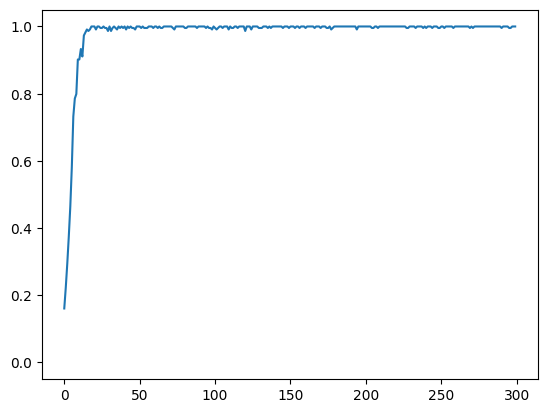

average accuracy : 0.9822510822510822


In [12]:
# 10fold validation 수행여부
bTenFoldValidation = True
if not bTenFoldValidation:  # 학습 & 테스트를 1회만 수행하는 경우
    # 데이터 분할
    [x_train, x_val, x_test, y_train, y_val, y_test] = exp.split_data(x_norm, y, test_ratio=0.0, val_ratio=0.2)

    # 모델 불러오기 & 컴파일
    g = deep.encoder(x.shape[1:])
        
    g.compile(loss=tfa.losses.TripletSemiHardLoss(), optimizer=Adam(learning_rate=0.0001))

    hist = g.fit(x_train, y_train, epochs=500, batch_size = 16, validation_data=(x_val, y_val))
    
    g.trainable=False
    m = deep.final_model(x.shape[1:], g, (1296,))
    
    m.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

    # 학습시 사용하는 옵션
    train_options = exp.TrainParams(m, epochs=1000, batch_size_per_class=16)

    # 학습
    result = exp.train_batches_with_random_selection(train_options, x_train, y_train, x_val, y_val)

    # 테스트
    if(x_test.shape[0] > 0):
        test_acc_tmp = np.sum(np.argmax(np.squeeze(result.model.predict(x_val)), -1) == y_val) / y_val.shape[0]
        print(f'test_acc:{test_acc_tmp}')
    # 결과 출력

    plt.plot(result.train_acc)
    plt.plot(result.val_acc)
    plt.show()

else:  # N fold Validation
    idx = np.array(range(n_row))
    np.random.shuffle(idx)  # 데이터 인덱스 섞기
    
    # General settings
    base_settings = {'epochs': 300}
    # Grid search
    grid = {
        'batch_size': [32, 64, 128],
        'learning_rate': [0.001, 0.0001]
    }

    N = 10
    total = 0
    nClass = 2
    cm = np.zeros([N, nClass, nClass])
    for i in range(N):
        # Train/Test 데이터 분할
        [x_train, x_test, y_train, y_test] = exp.split_data_for_N_fold_validation(x, y, fold=N, idx=i)

        # 모델 불러오기 & 컴파일
        g = deep.encoder(x.shape[1:])
        
        g.compile(loss=tfa.losses.TripletSemiHardLoss(), optimizer=Adam(learning_rate=0.001))

        # 학습
        hist = g.fit(x_train, y_train, epochs=500, batch_size = 64)
        g.trainable=False
        m = deep.final_model(x.shape[1:], g, g.output_shape[1:])
        
        m.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
        
        # 학습시 사용하는 옵션
        train_options = exp.TrainParams(m, epochs=300, batch_size_per_class=32)
        
        result = exp.train_batches_with_random_selection(train_options, x_train, y_train, bVerbose=False)
        
        # 테스트
        o = np.argmax(np.squeeze(result.model.predict(x_test)), -1)
        test_acc_tmp = np.sum(o == y_test) / y_test.shape[0]
        #for j in range(y_test.shape[0]):
            #cm[i, int(y_test[j]), int(o[j])] += 1  #Confusion Matrix 계산

        # 결과 출력
        print(f'{i}/{N}\t test_acc:{test_acc_tmp}')
        plt.plot(result.train_acc)
        plt.plot(result.val_acc)
        plt.show()
        total = total + test_acc_tmp

ave = total/10
print(f'average accuracy : {ave}')

Gird Search

8/8 [==============================] - 0s 2ms/step
0/10	 test_acc:0.9696969696969697


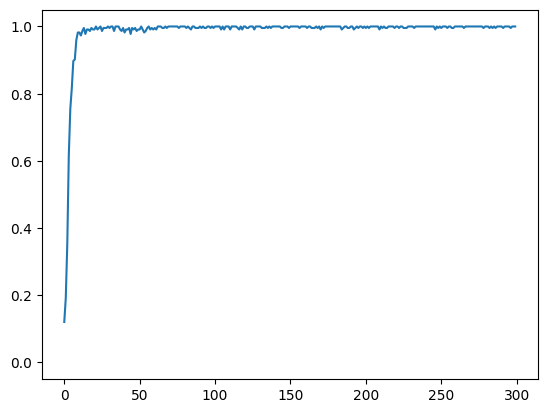

8/8 [==============================] - 0s 2ms/step
1/10	 test_acc:0.9826839826839827


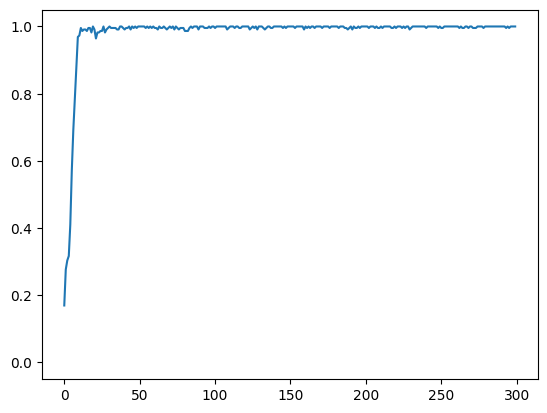

8/8 [==============================] - 0s 2ms/step
2/10	 test_acc:0.9696969696969697


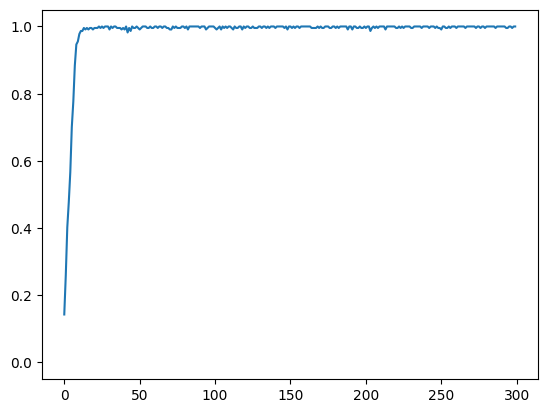

8/8 [==============================] - 0s 2ms/step
3/10	 test_acc:0.974025974025974


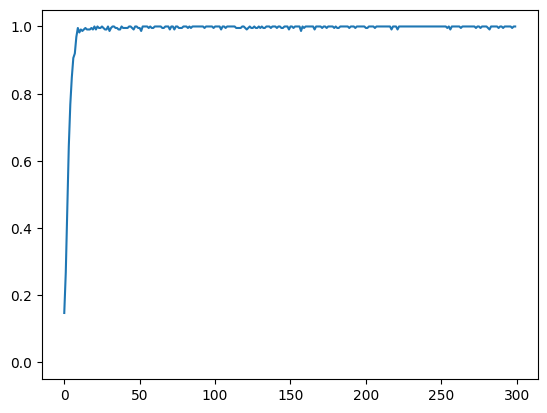

8/8 [==============================] - 0s 2ms/step
4/10	 test_acc:0.9956709956709957


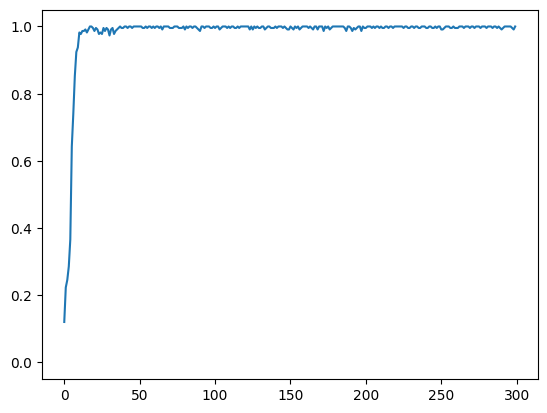

8/8 [==============================] - 0s 2ms/step
5/10	 test_acc:0.9956709956709957


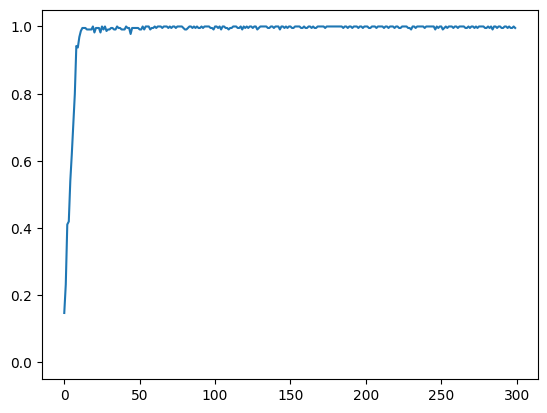

8/8 [==============================] - 0s 2ms/step
6/10	 test_acc:0.9913419913419913


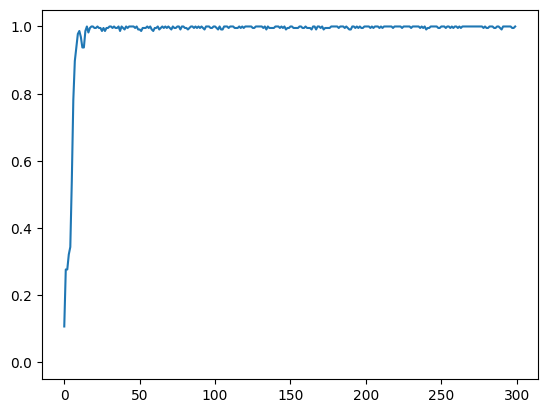

8/8 [==============================] - 0s 2ms/step
7/10	 test_acc:0.9826839826839827


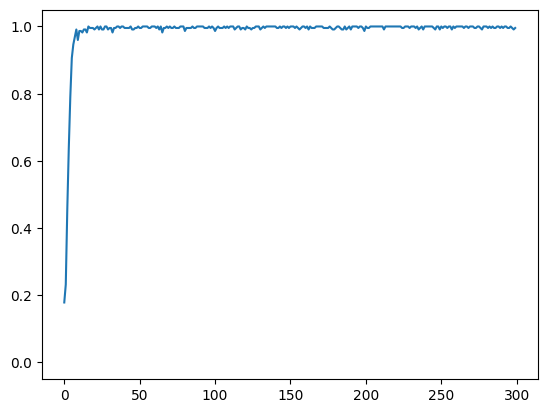

8/8 [==============================] - 0s 2ms/step
8/10	 test_acc:0.9956709956709957


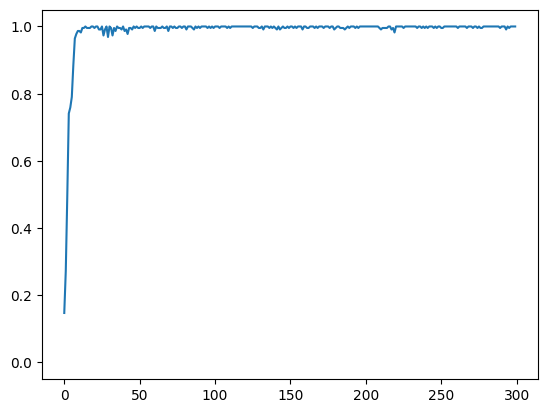

8/8 [==============================] - 0s 2ms/step
9/10	 test_acc:0.974025974025974


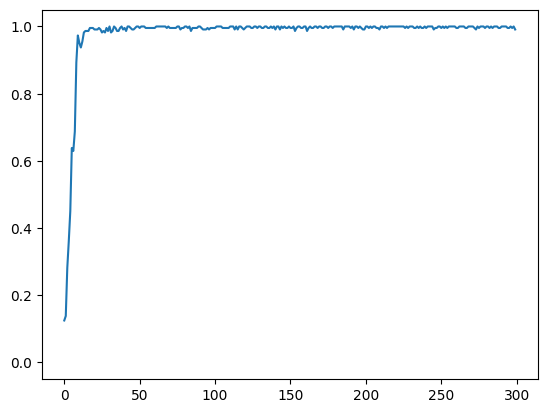

average accuracy : 0.9831168831168832
8/8 [==============================] - 0s 2ms/step
0/10	 test_acc:0.9783549783549783


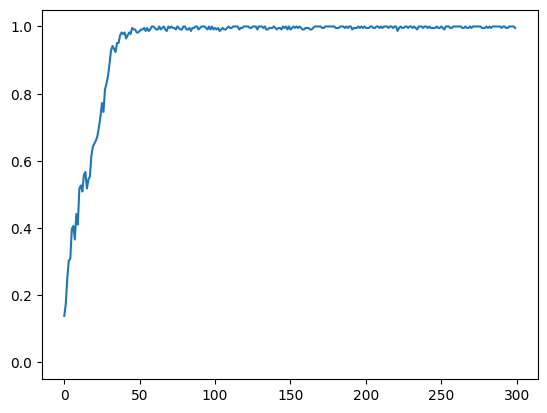

8/8 [==============================] - 0s 2ms/step
1/10	 test_acc:0.961038961038961


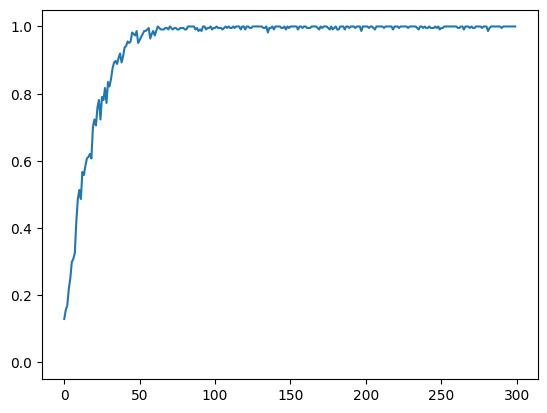

8/8 [==============================] - 0s 2ms/step
2/10	 test_acc:0.961038961038961


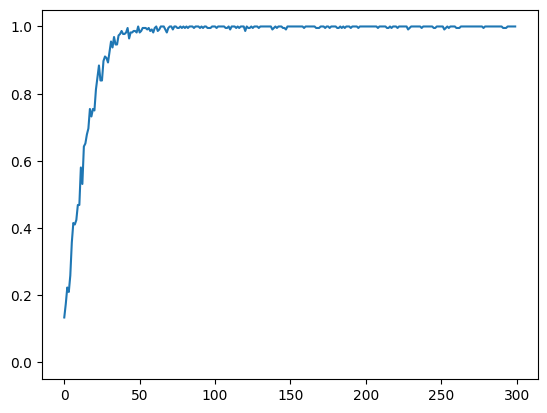

8/8 [==============================] - 0s 2ms/step
3/10	 test_acc:0.9783549783549783


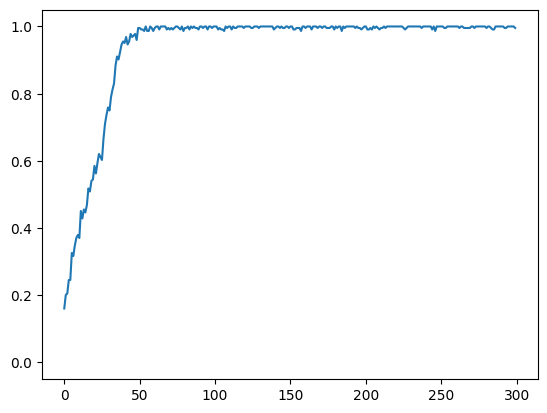

8/8 [==============================] - 0s 2ms/step
4/10	 test_acc:0.9913419913419913


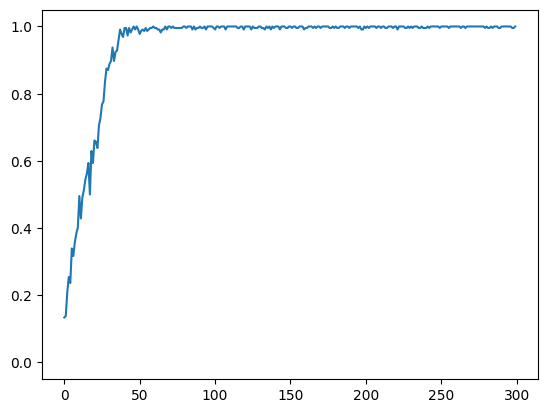

8/8 [==============================] - 0s 2ms/step
5/10	 test_acc:0.987012987012987


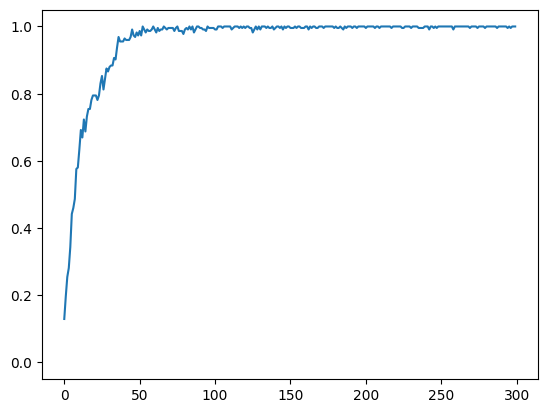

8/8 [==============================] - 0s 4ms/step
6/10	 test_acc:0.987012987012987


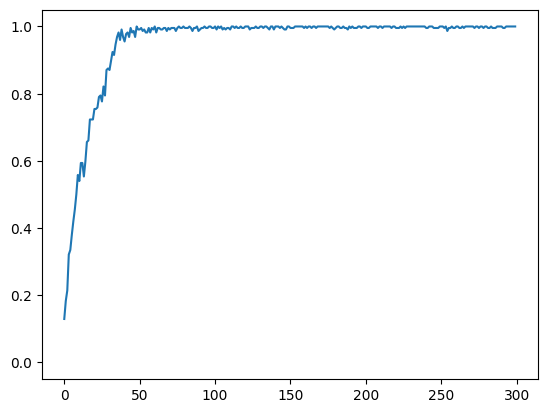

8/8 [==============================] - 0s 4ms/step
7/10	 test_acc:0.974025974025974


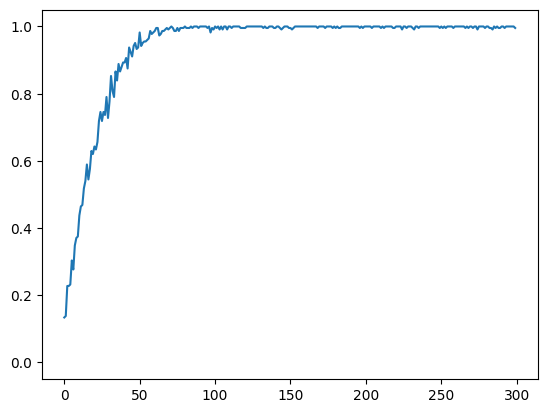

8/8 [==============================] - 0s 4ms/step
8/10	 test_acc:0.9913419913419913


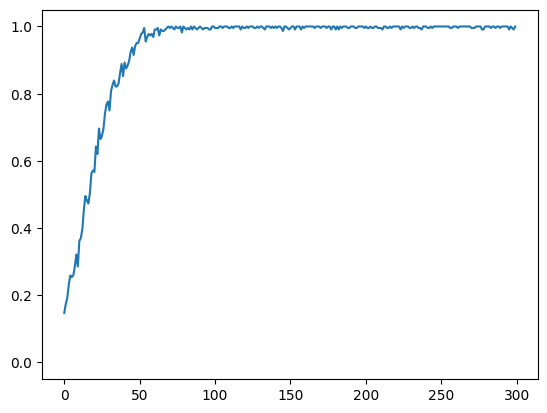

8/8 [==============================] - 0s 2ms/step
9/10	 test_acc:0.9826839826839827


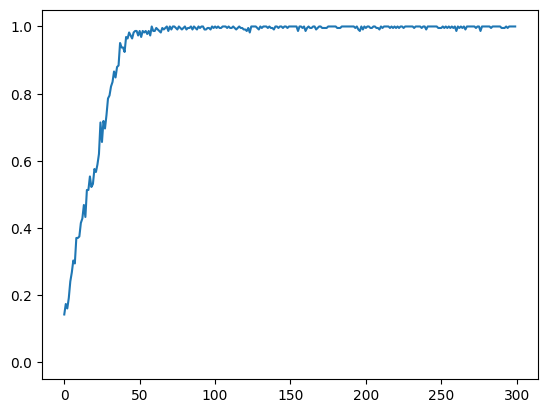

average accuracy : 0.979220779220779
8/8 [==============================] - 0s 2ms/step
0/10	 test_acc:0.9653679653679653


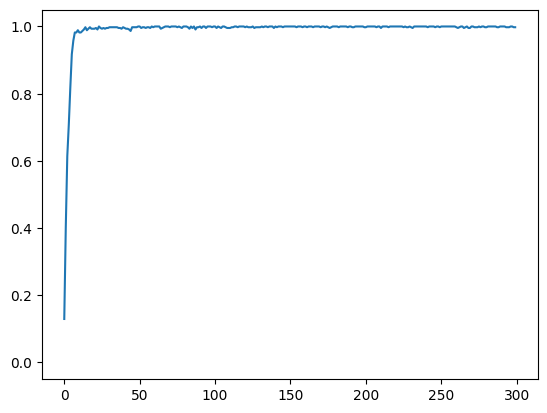

8/8 [==============================] - 0s 2ms/step
1/10	 test_acc:0.974025974025974


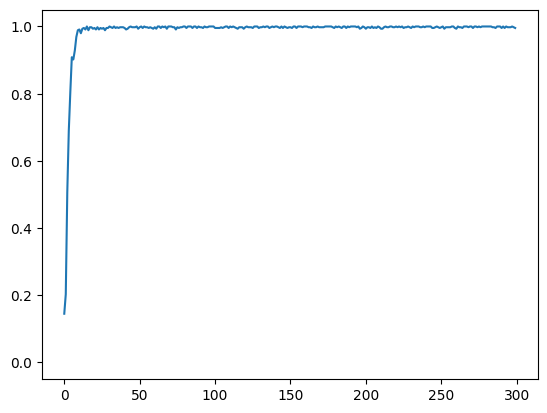

8/8 [==============================] - 0s 2ms/step
2/10	 test_acc:0.974025974025974


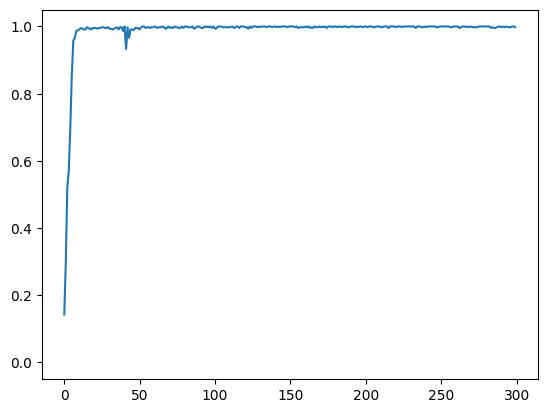

8/8 [==============================] - 0s 2ms/step
3/10	 test_acc:0.9826839826839827


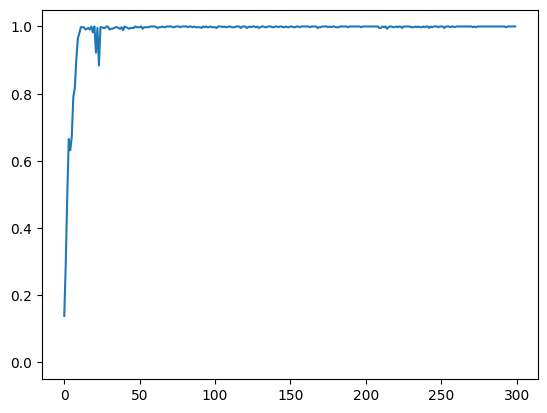

8/8 [==============================] - 0s 3ms/step
4/10	 test_acc:0.9956709956709957


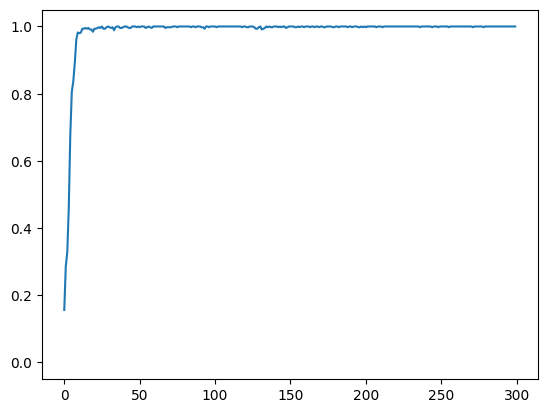

8/8 [==============================] - 0s 2ms/step
5/10	 test_acc:0.9913419913419913


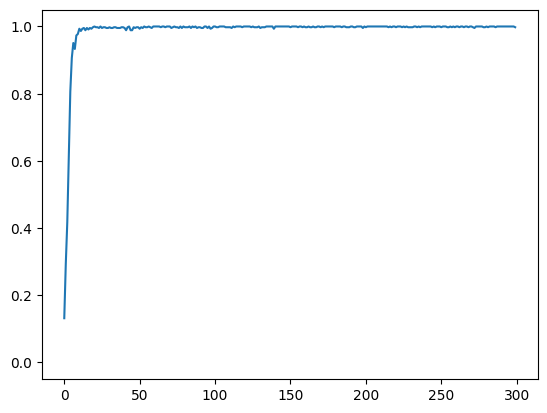

8/8 [==============================] - 0s 2ms/step
6/10	 test_acc:0.987012987012987


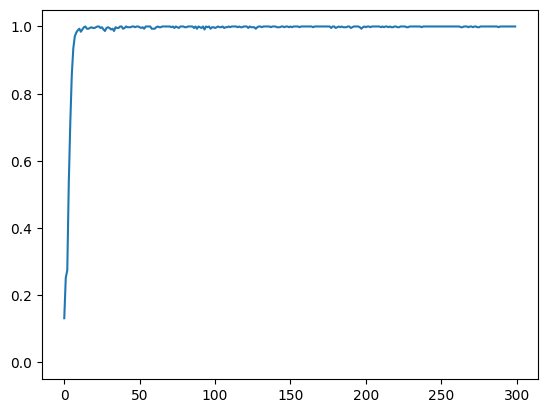

8/8 [==============================] - 0s 2ms/step
7/10	 test_acc:0.9696969696969697


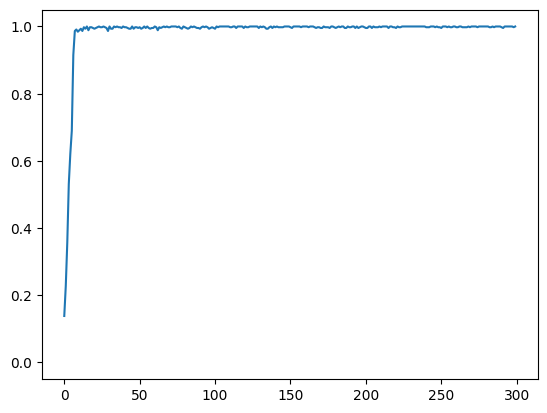

8/8 [==============================] - 0s 2ms/step
8/10	 test_acc:0.9956709956709957


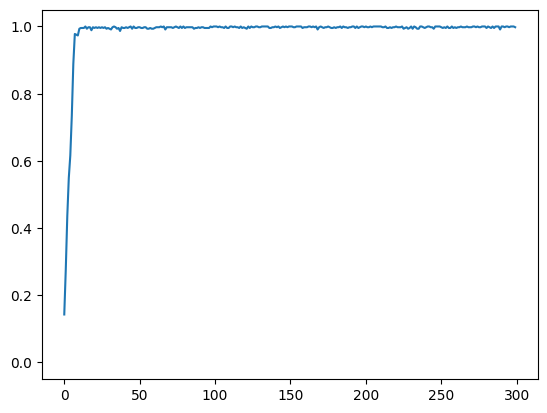

8/8 [==============================] - 0s 2ms/step
9/10	 test_acc:0.9826839826839827


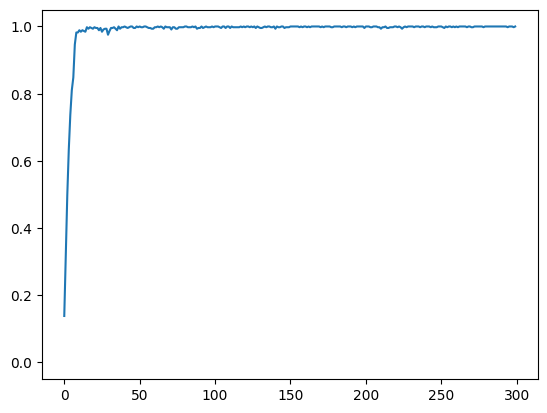

average accuracy : 0.9818181818181817
8/8 [==============================] - 0s 2ms/step
0/10	 test_acc:0.974025974025974


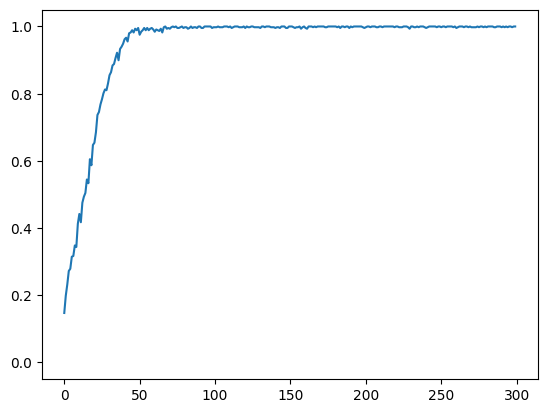

8/8 [==============================] - 0s 2ms/step
1/10	 test_acc:0.9653679653679653


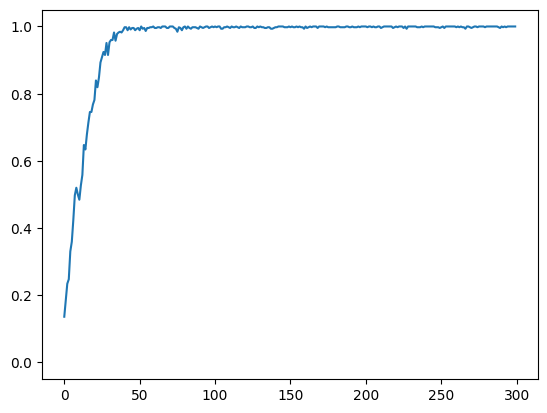

8/8 [==============================] - 0s 2ms/step
2/10	 test_acc:0.974025974025974


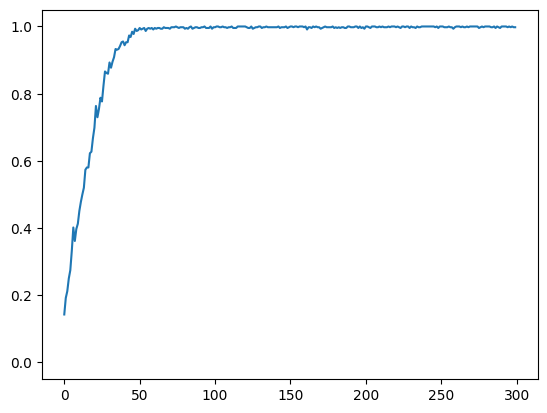

8/8 [==============================] - 0s 2ms/step
3/10	 test_acc:0.974025974025974


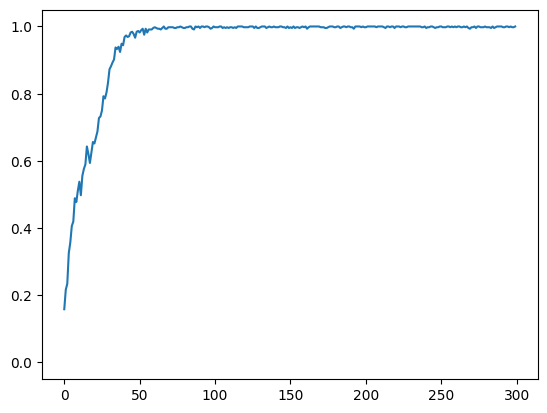

8/8 [==============================] - 0s 2ms/step
4/10	 test_acc:0.987012987012987


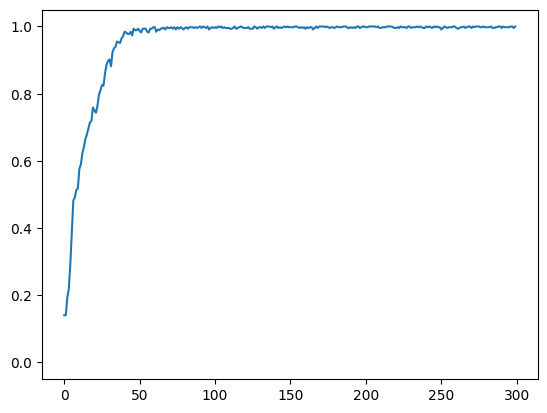

8/8 [==============================] - 0s 2ms/step
5/10	 test_acc:0.9913419913419913


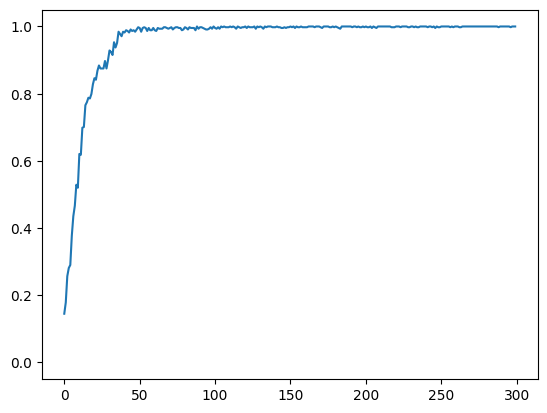

8/8 [==============================] - 0s 2ms/step
6/10	 test_acc:0.9913419913419913


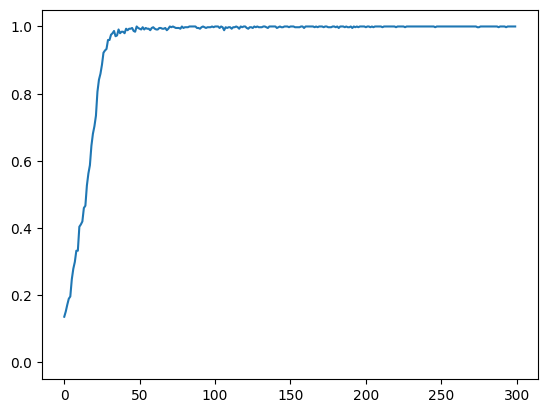

8/8 [==============================] - 0s 3ms/step
7/10	 test_acc:0.987012987012987


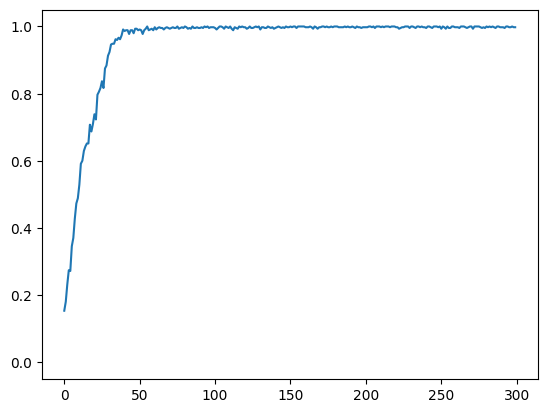

8/8 [==============================] - 0s 2ms/step
8/10	 test_acc:0.9913419913419913


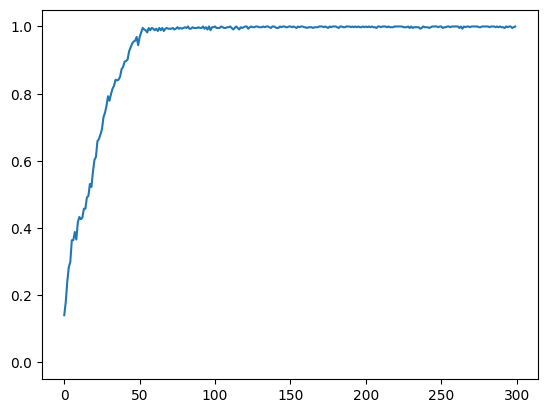

8/8 [==============================] - 0s 2ms/step
9/10	 test_acc:0.9826839826839827


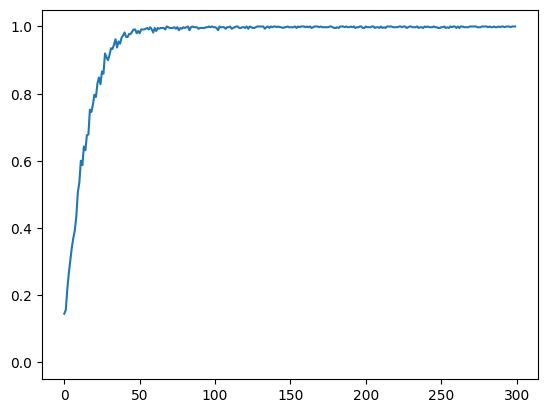

average accuracy : 0.9818181818181817
8/8 [==============================] - 0s 2ms/step
0/10	 test_acc:0.9696969696969697


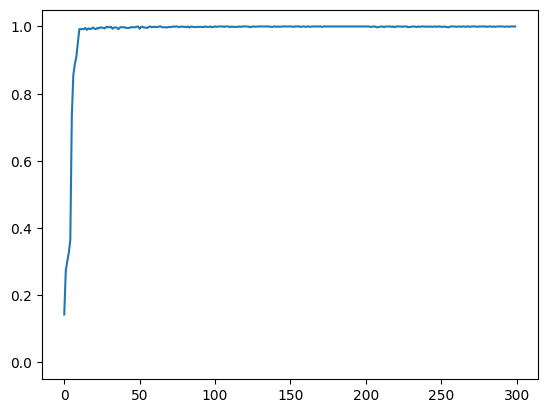

8/8 [==============================] - 0s 2ms/step
1/10	 test_acc:0.9783549783549783


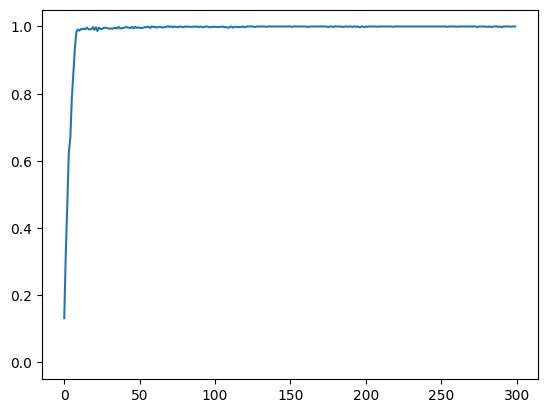

8/8 [==============================] - 0s 2ms/step
2/10	 test_acc:0.974025974025974


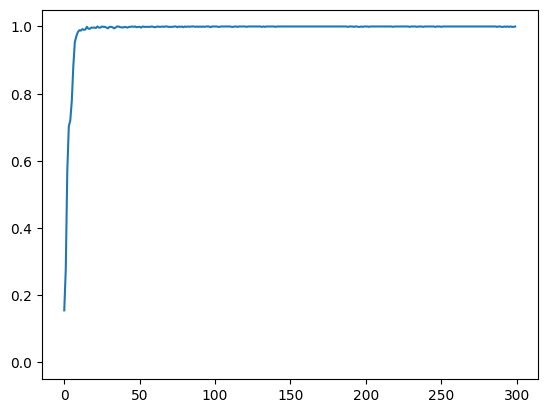

8/8 [==============================] - 0s 2ms/step
3/10	 test_acc:0.9783549783549783


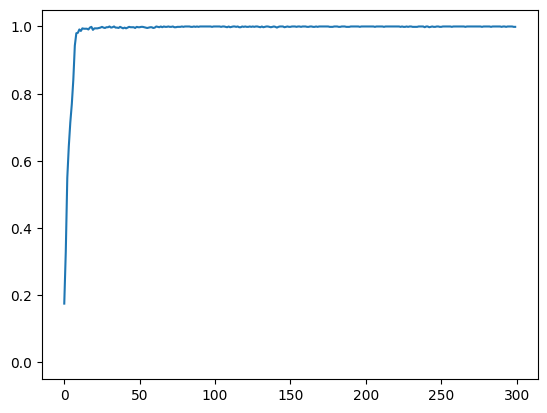

8/8 [==============================] - 0s 2ms/step
4/10	 test_acc:0.9783549783549783


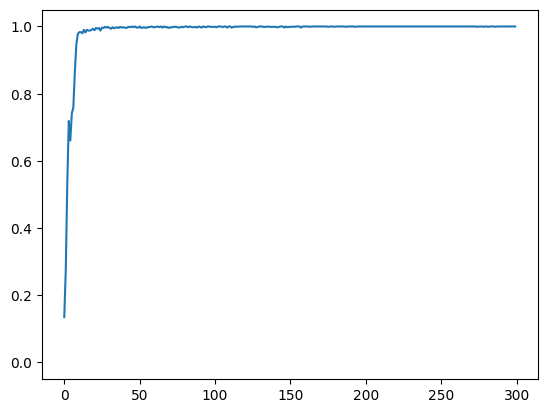

8/8 [==============================] - 0s 2ms/step
5/10	 test_acc:0.9956709956709957


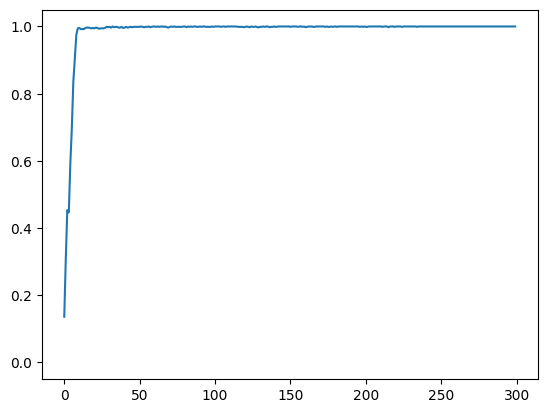

8/8 [==============================] - 0s 2ms/step
6/10	 test_acc:0.987012987012987


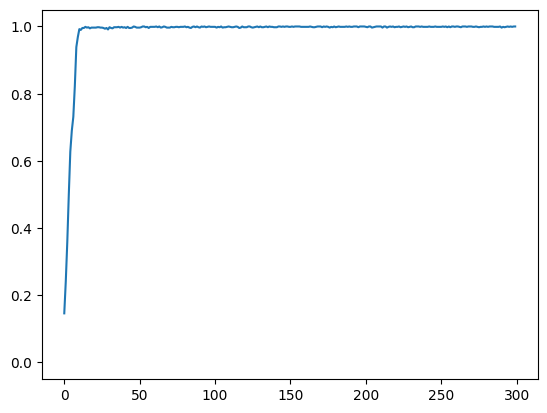

8/8 [==============================] - 0s 2ms/step
7/10	 test_acc:0.9783549783549783


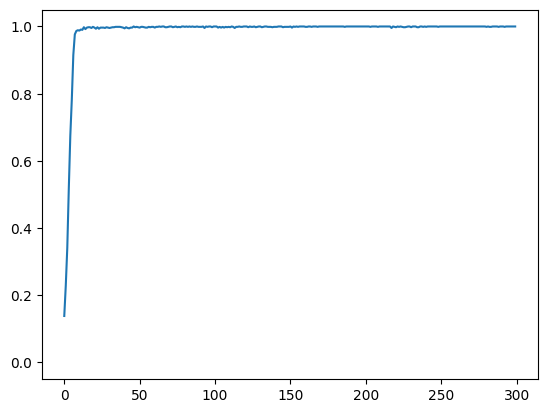

8/8 [==============================] - 0s 2ms/step
8/10	 test_acc:0.9956709956709957


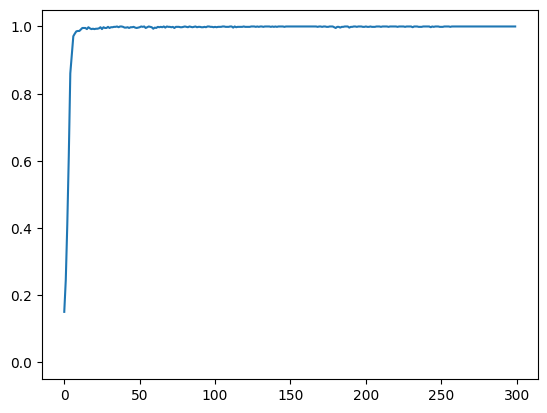

8/8 [==============================] - 0s 2ms/step
9/10	 test_acc:0.987012987012987


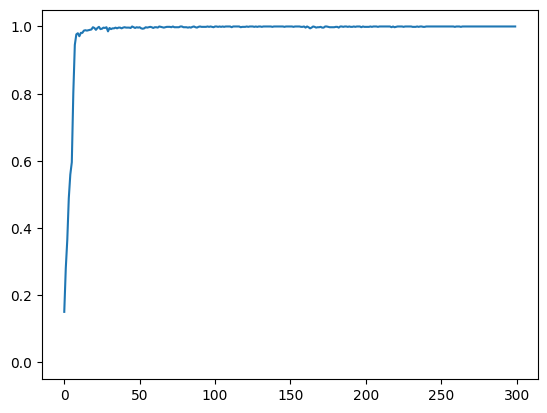

average accuracy : 0.9822510822510822
8/8 [==============================] - 0s 3ms/step
0/10	 test_acc:0.9653679653679653


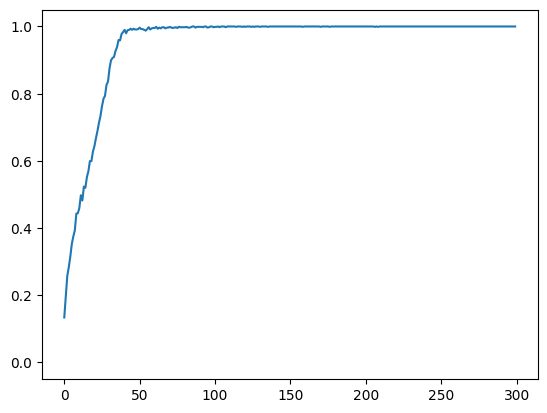

8/8 [==============================] - 0s 2ms/step
1/10	 test_acc:0.948051948051948


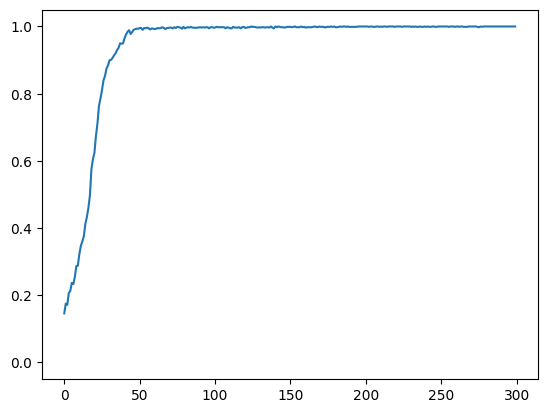

8/8 [==============================] - 0s 2ms/step
2/10	 test_acc:0.9696969696969697


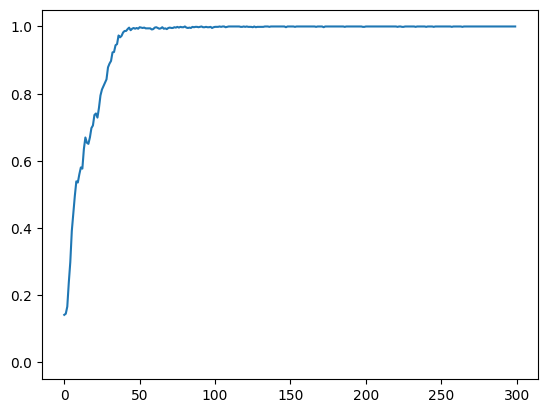

8/8 [==============================] - 0s 2ms/step
3/10	 test_acc:0.9826839826839827


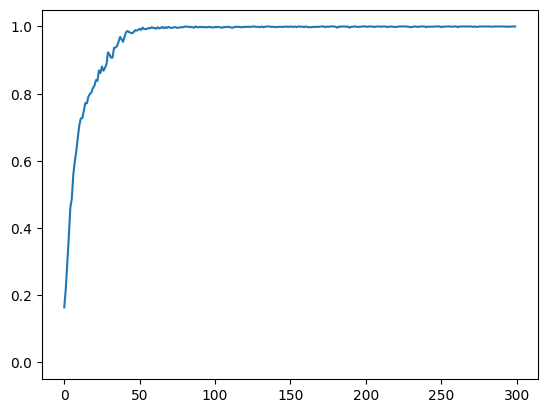

8/8 [==============================] - 0s 2ms/step
4/10	 test_acc:0.987012987012987


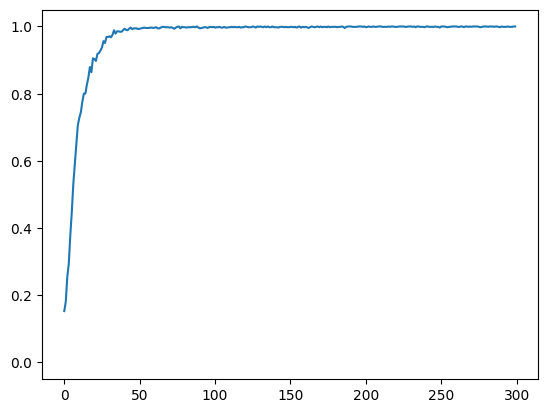

8/8 [==============================] - 0s 2ms/step
5/10	 test_acc:0.987012987012987


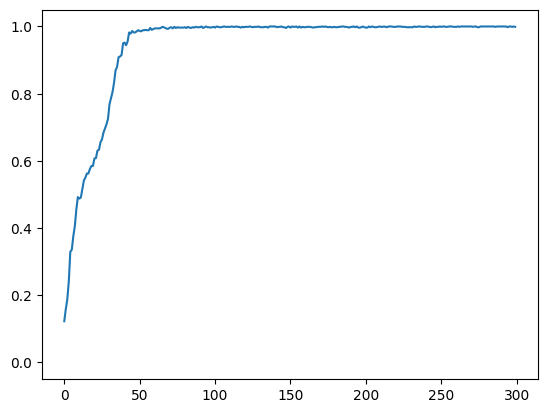

8/8 [==============================] - 0s 2ms/step
6/10	 test_acc:0.9913419913419913


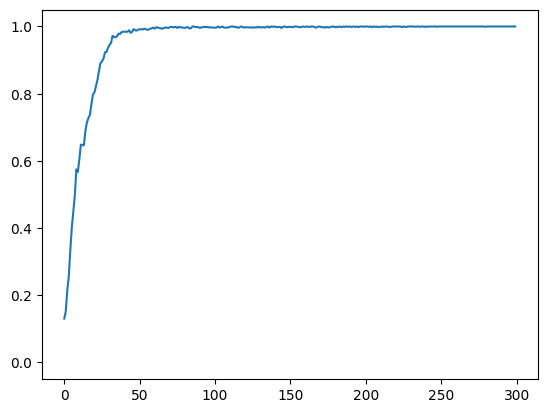

8/8 [==============================] - 0s 2ms/step
7/10	 test_acc:0.974025974025974


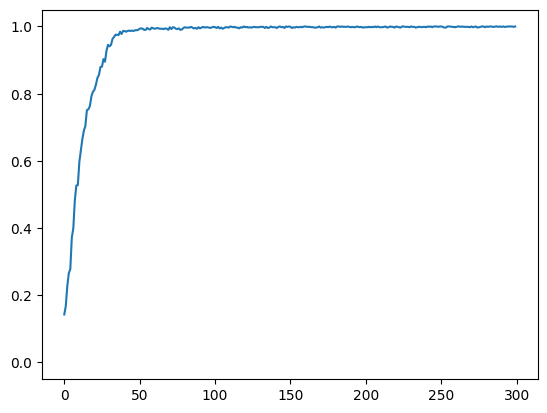

8/8 [==============================] - 0s 2ms/step
8/10	 test_acc:0.9956709956709957


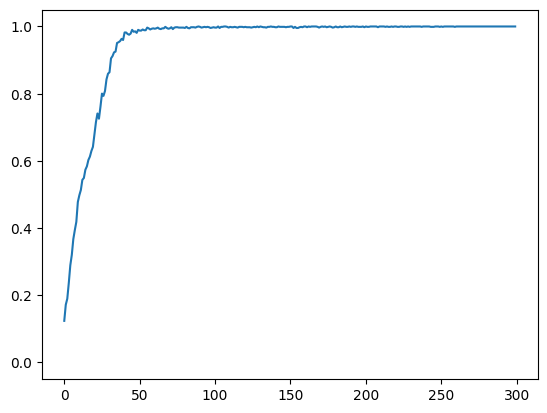

8/8 [==============================] - 0s 2ms/step
9/10	 test_acc:0.987012987012987


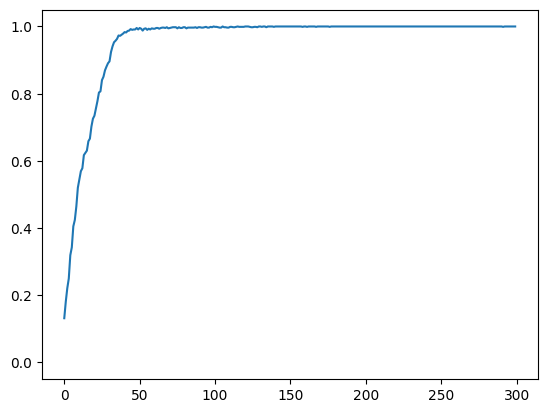

average accuracy : 0.9787878787878788


In [73]:
# 10fold validation 수행여부
bTenFoldValidation = True
if not bTenFoldValidation:  # 학습 & 테스트를 1회만 수행하는 경우
    # 데이터 분할
    [x_train, x_val, x_test, y_train, y_val, y_test] = exp.split_data(x_norm, y, test_ratio=0.0, val_ratio=0.2)

    # 모델 불러오기 & 컴파일
    g = deep.encoder(x.shape[1:])
        
    g.compile(loss=tfa.losses.TripletSemiHardLoss(), optimizer=Adam(learning_rate=0.0001))

    hist = g.fit(x_train, y_train, epochs=500, batch_size = 16, validation_data=(x_val, y_val))
    
    g.trainable=False
    m = deep.final_model(x.shape[1:], g, (1296,))
    
    m.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

    # 학습시 사용하는 옵션
    train_options = exp.TrainParams(m, epochs=1000, batch_size_per_class=16)

    # 학습
    result = exp.train_batches_with_random_selection(train_options, x_train, y_train, x_val, y_val)

    # 테스트
    if(x_test.shape[0] > 0):
        test_acc_tmp = np.sum(np.argmax(np.squeeze(result.model.predict(x_val)), -1) == y_val) / y_val.shape[0]
        print(f'test_acc:{test_acc_tmp}')
    # 결과 출력

    plt.plot(result.train_acc)
    plt.plot(result.val_acc)
    plt.show()

else:  # N fold Validation
    idx = np.array(range(n_row))
    np.random.shuffle(idx)  # 데이터 인덱스 섞기
    
    # hyperparameters
    
    nbatch_size = [32, 64, 128]
    nlearning_rate = [0.001, 0.0001]
    nepochs  = [300]
    
    cols = ['batch_size', 'learning_rate', 'epochs', 'test acc']
    perform_df = pd.DataFrame(columns = cols)
    
    #grid search
    g_i = 0

    N = 10
    nClass = 2
    cm = np.zeros([N, nClass, nClass])
    
    for bs, lr, e in product(nbatch_size, nlearning_rate, nepochs):
        g_i += 1
        total = 0
        for i in range(N):
            # Train/Test 데이터 분할
            [x_train, x_test, y_train, y_test] = exp.split_data_for_N_fold_validation(x, y, fold=N, idx=i)

            # 모델 불러오기 & 컴파일
            g = deep.encoder(x.shape[1:])
            
            g.compile(loss=tfa.losses.TripletSemiHardLoss(), optimizer=Adam(learning_rate=0.001))

            # 학습
            hist = g.fit(x_train, y_train, epochs=500, batch_size = 64, verbose=0)
            g.trainable=False
            m = deep.final_model(x.shape[1:], g, g.output_shape[1:])
            
            m.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])
            
            # 학습시 사용하는 옵션
            train_options = exp.TrainParams(m, epochs=e, batch_size_per_class=bs)
            
            result = exp.train_batches_with_random_selection(train_options, x_train, y_train, bVerbose=False)
            
            # 테스트
            o = np.argmax(np.squeeze(result.model.predict(x_test)), -1)
            test_acc_tmp = np.sum(o == y_test) / y_test.shape[0]
            #for j in range(y_test.shape[0]):
                #cm[i, int(y_test[j]), int(o[j])] += 1  #Confusion Matrix 계산

            # 결과 출력
            print(f'{i}/{N}\t test_acc:{test_acc_tmp}')
            plt.plot(result.train_acc)
            plt.plot(result.val_acc)
            plt.show()
            total = total + test_acc_tmp
        ave = total/10
        perform_df.loc[g_i] = [bs, lr, e, ave]
        print(f'average accuracy : {ave}')

In [68]:
perform_df = perform_df.sort_values(by='test acc')
perform_df

,batch_size,learning_rate,epochs,test acc
5,128.0,0.0010,300.0,0.964069
3,64.0,0.0010,300.0,0.977922
2,32.0,0.0001,300.0,0.978788
6,128.0,0.0001,300.0,0.978788
1,32.0,0.0010,300.0,0.979221
4,64.0,0.0001,300.0,0.979221


In [3]:
# 텍스트 파일에서 Confusion matrix 불러오기
loaded_cm = np.loadtxt('confusion_matrix.txt', dtype=int, delimiter='\t')
print(loaded_cm)

[[329   0   0   1   0   0   0]
 [  0 330   0   0   0   0   0]
 [  2   1 317   3   6   0   1]
 [  3   0   4 318   5   0   0]
 [  1   0  10   4 315   0   0]
 [  0   0   0   0   0 330   0]
 [  0   0   0   1   0   0 329]]


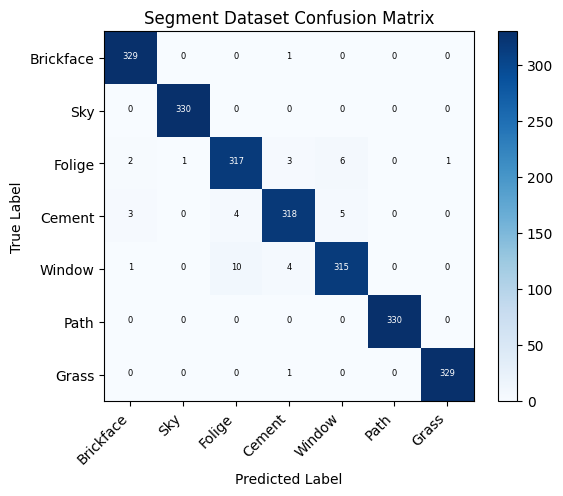

In [4]:
conf_matrix = loaded_cm

# 시각화
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Segment Dataset Confusion Matrix')
plt.colorbar()

classes = ['Brickface', 'Sky', 'Folige', 'Cement', 'Window', 'Path', 'Grass']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, ha='right')
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 각 셀에 숫자 표시
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(int(conf_matrix[i, j])),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black",
                 fontsize=6)  # 숫자의 글자 크기 조절

plt.show()
